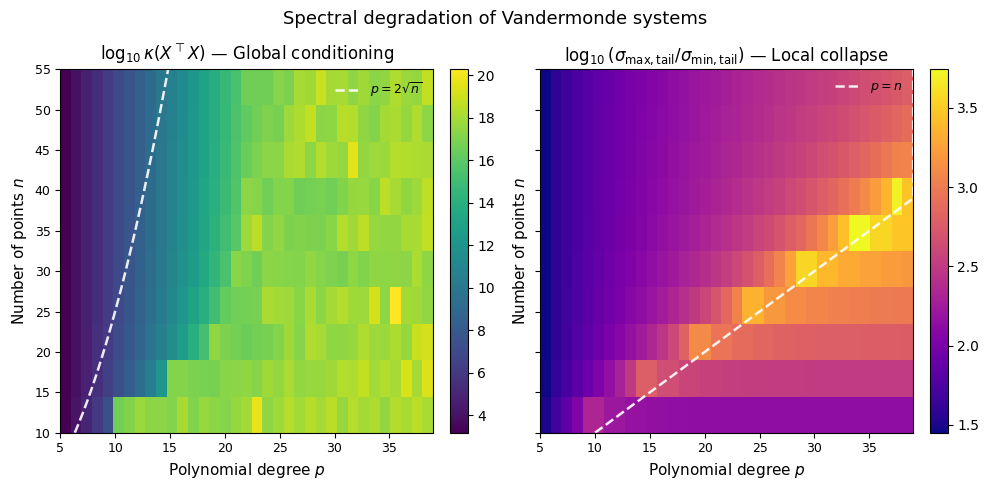

Saved plot to:
c:\Users\vikto\Desktop\fysstk3155\project-1\code\figures\vandermonde_condition_and_tail.pdf


In [23]:
# -------------------
# Vandermonde Conditioning and Spectral Tail Collapse
# -------------------

import os, sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt
from src.basis import vandermonde
from src.data import equispaced_points

# -------------------
# Config
# -------------------
n_range = range(10, 60, 5)
p_range = range(5, 40)
k_small = 5
log = True

# -------------------
# Compute conditioning and spectral collapse
# -------------------
cond_map = np.zeros((len(n_range), len(p_range)))
tail_ratio = np.zeros_like(cond_map)

for i, n in enumerate(n_range):
    x = equispaced_points(n)
    for j, p in enumerate(p_range):
        X = vandermonde(x, p)
        cond_map[i, j] = np.linalg.cond(X.T @ X)
        s = np.linalg.svd(X, compute_uv=False)
        s = s / s[0]
        tail = s[-k_small:] if len(s) >= k_small else s
        tail_ratio[i, j] = tail[0] / tail[-1] if len(tail) > 1 else 1.0

if log:
    cond_map = np.log10(cond_map)
    tail_ratio = np.log10(tail_ratio)

# -------------------
# Plot results
# -------------------
extent = [min(p_range), max(p_range), min(n_range), max(n_range)]
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

im1 = axs[0].imshow(cond_map, origin="lower", aspect="auto",
                    extent=extent, cmap="viridis", interpolation="nearest")
axs[0].set_title(r"$\log_{10}\kappa(X^\top X)$ — Global conditioning", fontsize=12)
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(tail_ratio, origin="lower", aspect="auto",
                    extent=extent, cmap="plasma", interpolation="nearest")
axs[1].set_title(r"$\log_{10}(\sigma_{\max,\text{tail}} / \sigma_{\min,\text{tail}})$ — Local collapse", fontsize=12)
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

# -------------------
# Reference curves
# -------------------
n_line = np.linspace(min(n_range), max(n_range), 300)

# LEFT: p = 2√n
p_left = 2 * np.sqrt(n_line)
p_left = np.clip(p_left, min(p_range), max(p_range))  # prevent overshoot
axs[0].plot(p_left, n_line, 'w--', lw=1.8, alpha=0.9, label=r"$p = 2\sqrt{n}$")

# RIGHT: p = n
p_right = n_line
p_right = np.clip(p_right, min(p_range), max(p_range))
axs[1].plot(p_right, n_line, 'w--', lw=1.8, alpha=0.9, label=r"$p = n$")

# Common formatting
for ax in axs:
    ax.set_xlabel("Polynomial degree $p$", fontsize=11)
    ax.set_ylabel("Number of points $n$", fontsize=11)
    ax.legend(frameon=False, fontsize=9)
    ax.tick_params(labelsize=9)
    ax.set_facecolor("white")
    ax.set_xlim(min(p_range), max(p_range))
    ax.set_ylim(min(n_range), max(n_range))

fig.suptitle(r"Spectral degradation of Vandermonde systems", fontsize=13, y=0.97)
plt.tight_layout()
plt.show()

# -------------------
# Save results
# -------------------
fig_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'figures'))
os.makedirs(fig_dir, exist_ok=True)

out_path_pdf = os.path.join(fig_dir, 'vandermonde_condition_and_tail.pdf')
fig.savefig(out_path_pdf, bbox_inches="tight")
print(f"Saved plot to:\n{out_path_pdf}")


C:\Users\vikto\AppData\Local\Temp\ipykernel_56168\3905684396.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, fontsize=9)


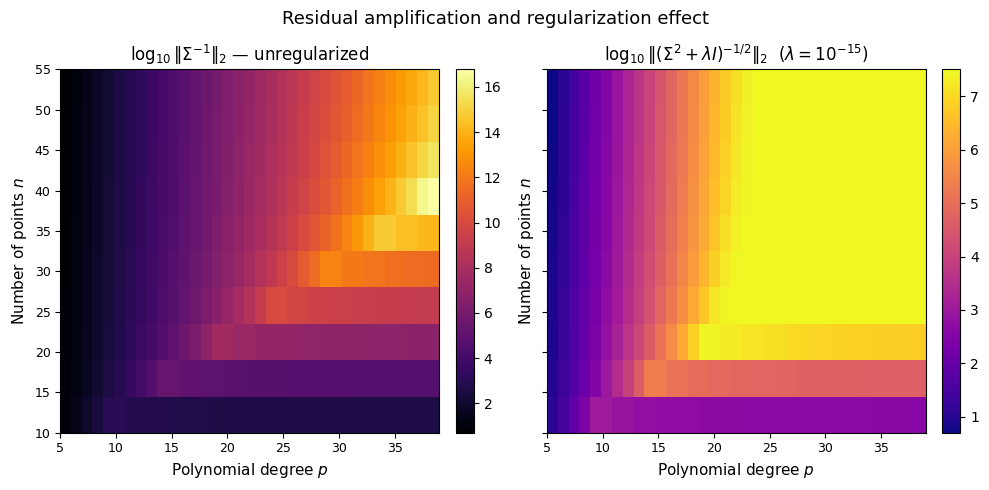

Saved plot to:
c:\Users\vikto\Desktop\fysstk3155\project-1\code\figures\regularization_heatmap.pdf


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from src.basis import vandermonde
from src.data import equispaced_points

def vandermonde_residual_amplification_regularized(
    n_range=range(10, 60, 5),
    p_range=range(5, 40),
    lam=1e-15,
    cmap_left="inferno",
    cmap_right="plasma",
):
    amp_unreg = np.zeros((len(n_range), len(p_range)))
    amp_reg   = np.zeros_like(amp_unreg)

    for i, n in enumerate(n_range):
        x = equispaced_points(n)
        for j, p in enumerate(p_range):
            X = vandermonde(x, p)
            s = np.linalg.svd(X, compute_uv=False)
            # unregularized amplification  ~ 1/σ_min
            amp_unreg[i, j] = 1 / s[-1]
            # ridge-regularized amplification  ~ 1/(σ_min^2 + λ)^{1/2}
            amp_reg[i, j]   = 1 / np.sqrt(s[-1]**2 + lam)

    # log scale for readability
    amp_unreg = np.log10(amp_unreg)
    amp_reg   = np.log10(amp_reg)

    extent = [min(p_range), max(p_range), min(n_range), max(n_range)]
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

    # --- Left: unregularized ---
    im1 = axs[0].imshow(amp_unreg, origin="lower", aspect="auto",
                        extent=extent, cmap=cmap_left, interpolation="nearest")
    axs[0].set_title(r"$\log_{10}\|\Sigma^{-1}\|_2$ — unregularized", fontsize=12)
    fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

    # --- Right: ridge-regularized ---
    im2 = axs[1].imshow(amp_reg, origin="lower", aspect="auto",
                        extent=extent, cmap=cmap_right, interpolation="nearest")
    axs[1].set_title(r"$\log_{10}\|(\Sigma^2+\lambda I)^{-1/2}\|_2$  ($\lambda=10^{-15}$)", fontsize=12)
    fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

    # shared styling
    for ax in axs:
        ax.set_xlabel("Polynomial degree $p$", fontsize=11)
        ax.set_ylabel("Number of points $n$", fontsize=11)
        ax.legend(frameon=False, fontsize=9)
        ax.tick_params(labelsize=9)
        ax.set_facecolor("white")

    fig.suptitle(r"Residual amplification and regularization effect", fontsize=13, y=0.97)
    plt.tight_layout()
    return fig

fig = vandermonde_residual_amplification_regularized()
plt.show()

fig_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'figures'))
os.makedirs(fig_dir, exist_ok=True)

out_path_pdf = os.path.join(fig_dir, 'regularization_heatmap.pdf')
fig.savefig(out_path_pdf, bbox_inches="tight")
print(f"Saved plot to:\n{out_path_pdf}")
